# Logistic Regression — Training Loop (Gradient Descent)

## Objective
Implement logistic regression **from scratch** using gradient descent,
understanding how:
- probabilities are produced
- decision boundaries emerge
- loss and accuracy evolve during training


In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)


In [3]:
# Two separable classes
n = 100

X0 = np.random.randn(n, 2) + np.array([-2, -2])
X1 = np.random.randn(n, 2) + np.array([2, 2])

X = np.vstack((X0, X1))
y = np.array([0]*n + [1]*n)

# Add bias term
X = np.c_[np.ones(X.shape[0]), X]


In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [5]:
def log_loss(y, y_hat):
    eps = 1e-15
    y_hat = np.clip(y_hat, eps, 1 - eps)
    return -np.mean(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))


In [6]:
def train_logistic_regression(X, y, lr=0.1, epochs=1000):
    m, n = X.shape
    w = np.zeros(n)

    losses = []
    accuracies = []

    for _ in range(epochs):
        z = X @ w
        y_hat = sigmoid(z)

        loss = log_loss(y, y_hat)
        losses.append(loss)

        # Gradient
        grad = (1/m) * X.T @ (y_hat - y)
        w -= lr * grad

        # Accuracy
        preds = (y_hat >= 0.5).astype(int)
        acc = np.mean(preds == y)
        accuracies.append(acc)

    return w, losses, accuracies


In [7]:
w, losses, accuracies = train_logistic_regression(X, y)


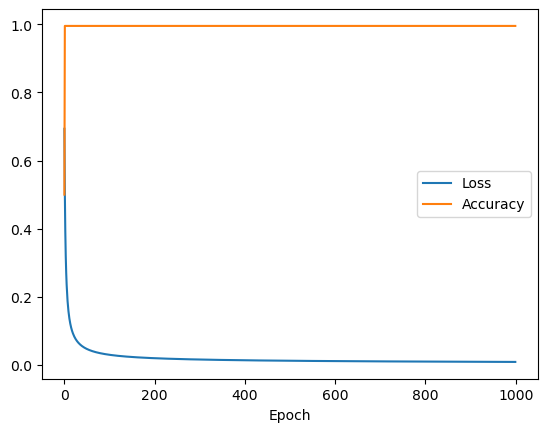

In [8]:
plt.plot(losses, label="Loss")
plt.plot(accuracies, label="Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()


In [10]:
def plot_decision_boundary(X, y, w):
    x_min, x_max = X[:,1].min()-1, X[:,1].max()+1
    y_min, y_max = X[:,2].min()-1, X[:,2].max()+1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )

    grid = np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel()]
    probs = sigmoid(grid @ w).reshape(xx.shape)

    plt.contour(xx, yy, probs, levels=[0.5], colors='black')
    plt.scatter(X[:,1], X[:,2], c=y, cmap='bwr')
    plt.show()


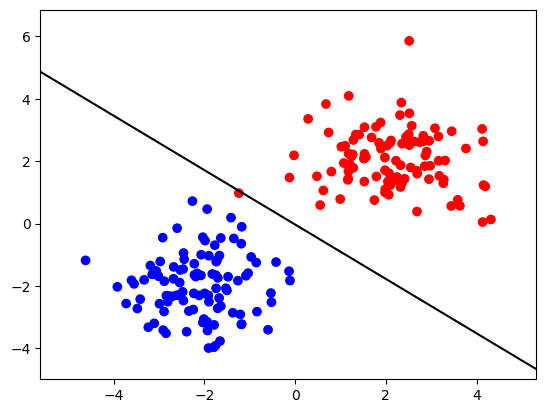

In [11]:
plot_decision_boundary(X, y, w)


### End-to-End Explanation

1. Compute linear score z = Xw
2. Convert score to probability using sigmoid
3. Measure confidence error using log loss
4. Compute gradients from prediction error
5. Update weights to shift decision boundary
6. Repeat until loss stabilizes
